# Facial Emotion Recognition Using EfficientNetB0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import seaborn as sns

data = np.load(r"C:\Users\ASUS\Downloads\facial_emotion_data.npz")
X = data['X']
y = data['y']

In [2]:
# Print shape of input data (X) and output data (y) after augmentation
print(X.shape)
print(y.shape)

(7752, 224, 224, 3)
(7752,)


In [3]:
from sklearn.model_selection import train_test_split

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [4]:
print(f'Length of Training Data: {len(X_train)}')
print(f'Length of Testing Data: {len(X_test)}')

Length of Training Data: 6201
Length of Testing Data: 1551


In [5]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, num_classes = 8)
y_test = to_categorical(y_test, num_classes = 8)

# EfficientNetB0

In [6]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import models, layers

# Building the model
early_stopping = EarlyStopping(monitor='val_accuracy', patience=10, mode='max', verbose=1, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience=3, mode='max', verbose=1, factor=0.5, min_lr=0.0001)
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False
model1 = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(8, activation='softmax')
])

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 23s 1us/step


In [7]:
# Compiling the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │         2,056 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,838,827 (18.46 MB)

 Trainable params: 789,256 (3.01 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [8]:

# Training the model
history = model1.fit(
    X_train, y_train, batch_size=20, validation_data=(X_test, y_test), epochs=20, callbacks=[early_stopping, lr_reduction]
)

Epoch 1/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 167s 510ms/step - accuracy: 0.2903 - loss: 1.8739 - val_accuracy: 0.6409 - val_loss: 0.9555 - learning_rate: 0.0010
Epoch 2/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 156s 503ms/step - accuracy: 0.6814 - loss: 0.8807 - val_accuracy: 0.8478 - val_loss: 0.4480 - learning_rate: 0.0010
Epoch 3/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 154s 495ms/step - accuracy: 0.8491 - loss: 0.4104 - val_accuracy: 0.9026 - val_loss: 0.3004 - learning_rate: 0.0010
Epoch 4/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 166s 534ms/step - accuracy: 0.8922 - loss: 0.3062 - val_accuracy: 0.9220 - val_loss: 0.2185 - learning_rate: 0.0010
Epoch 5/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 221s 710ms/step - accuracy: 0.9216 - loss: 0.2310 - val_accuracy: 0.9433 - val_loss: 0.1691 - learning_rate: 0.0010
Epoch 6/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 194s 625ms/step - accuracy: 0.9482 - loss: 0.1598 - val_accuracy: 0.9304 - val_loss: 0.2040 - learning_rate: 0.0010
Epoch 7/20
311/311 ━━━━━━━━━━━━━━━━━━━━ 212s 681ms/step - accura

In [9]:
# Evaluating the model
loss, accuracy = model1.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)
print("Loss:", loss)

49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 675ms/step - accuracy: 0.9838 - loss: 0.0495
Test Accuracy: 0.9845260977745056
Loss: 0.04257981851696968


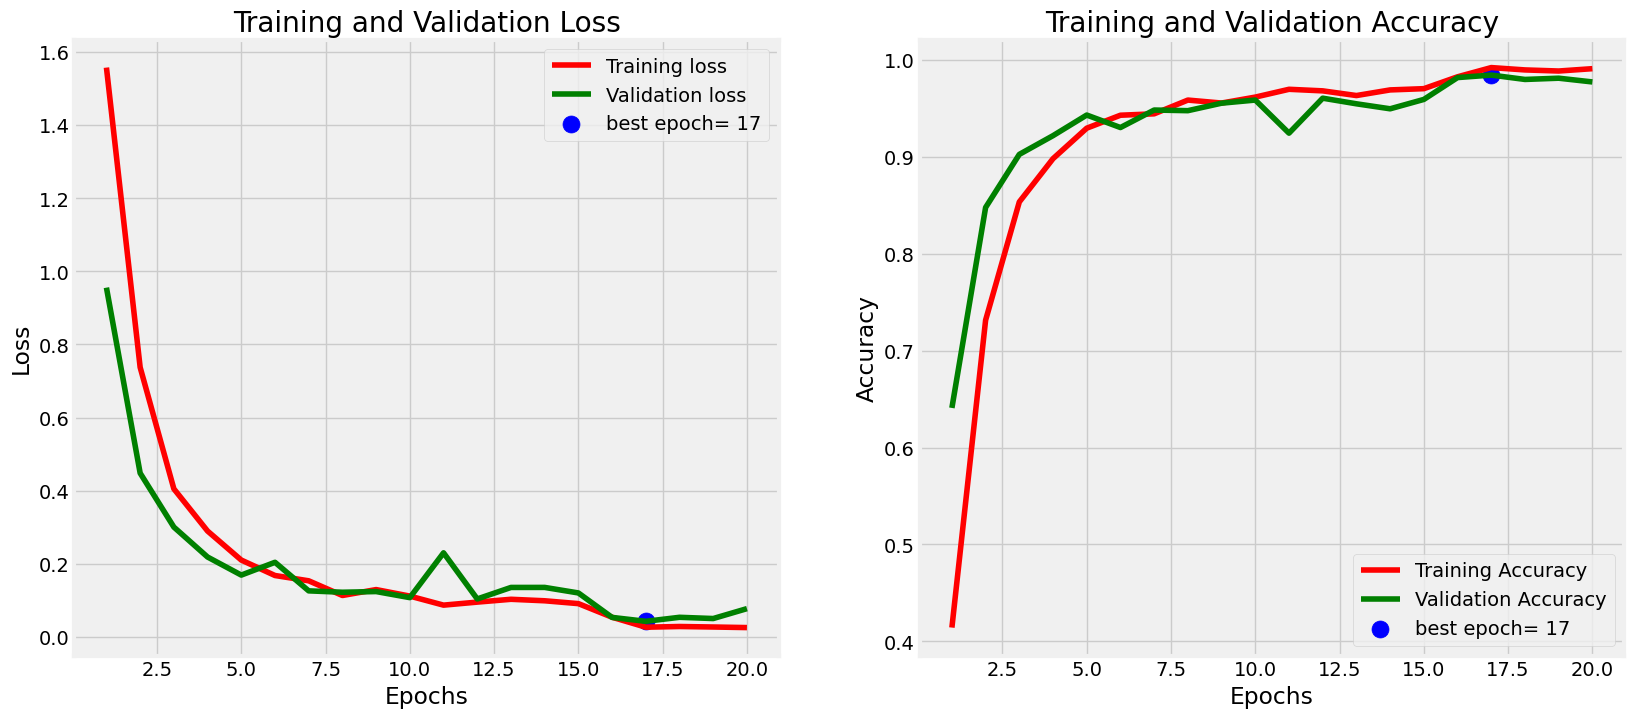

In [10]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]

Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout
plt.show()

In [11]:
from sklearn.metrics import classification_report

# Classification report
y_pred = model1.predict(X_test)
y_test = np.argmax(y_test, axis=1)
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))

49/49 ━━━━━━━━━━━━━━━━━━━━ 33s 634ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       206
           1       1.00      0.98      0.99       215
           2       1.00      1.00      1.00       203
           3       0.99      1.00      1.00       176
           4       0.98      0.94      0.96       179
           5       1.00      0.98      0.99       184
           6       0.99      0.98      0.99       194
           7       0.97      1.00      0.98       194

    accuracy                           0.98      1551
   macro avg       0.98      0.98      0.98      1551
weighted avg       0.98      0.98      0.98      1551



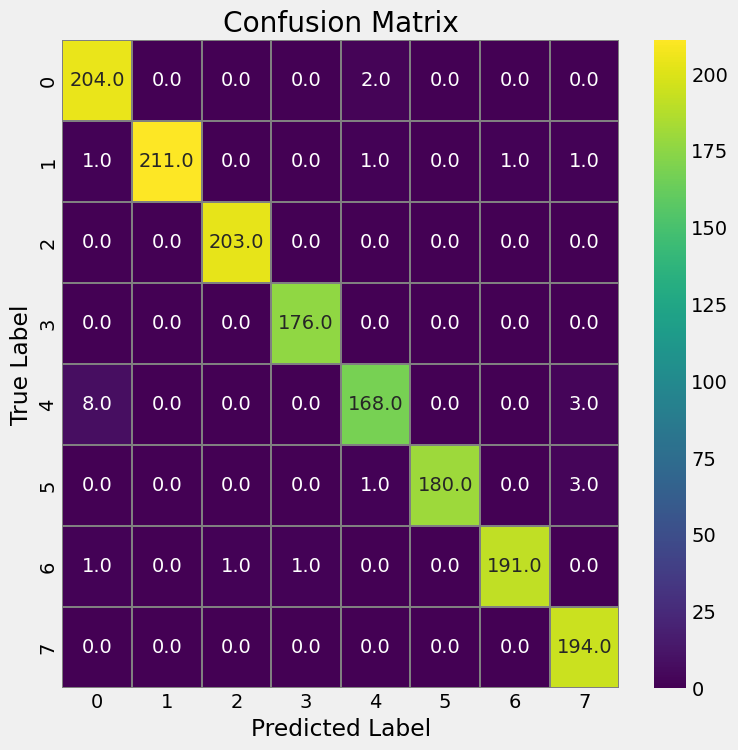

In [12]:
# Confusion matrix

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_mtx = confusion_matrix(y_test, y_pred_classes)
f, ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01, cmap="viridis", linecolor="gray", fmt='.1f', ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()